# Prosper Loan Data Exploration
## by Temitope Ayano

## Introduction
> **Dataset**: The Prosper Loan Data was used. 

> Prosper was founded in 2005 and was the first peer-to-peer lending marketplace in the United States. Prosper has facilitated more than 21 Dollars billion in loans to over 1.3M people.

> Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between 2,000 and 50,000 dollars. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

> The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling
> Preliminary Wrangling will be performed in order to understand the data structure and formulate more research questions.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading the dataset

In [2]:
#Load the dataset and view the first 5 lines
df=pd.read_csv('prosperLoanData.csv')
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Check the shape i.e rows and columns of the dataset
df.shape

(113937, 81)

In [4]:
#Check for information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
#Check the dataset for missing values
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
#Compute Summary Statistics on the dataframe
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
#Check for duplicated rows
df.duplicated().sum()

0


### NOTE
> Not all the columns will be useful for my analysis. I will need to drop some columns to create a new dataframe with desired columns.

In [46]:
#Create a new dataframe df_new with the desired columns
df_new = df[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 
             'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 
             'BorrowerState', 'Occupation','EmploymentStatus', 'EmploymentStatusDuration', 
             'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CurrentDelinquencies', 
             'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans', 
             'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations', 'Investors']]

In [41]:
#View the first 5 columns of the new dataframe
df_new.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,IsBorrowerHomeowner,CurrentlyInGroup,CurrentDelinquencies,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
0,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,Other,Self-employed,...,True,True,2.0,"$25,000-49,999",3083.333333,NaN,9425,330.43,0,258
1,36,Current,0.12016,0.0920,A,7.0,2,CO,Professional,Employed,...,False,False,0.0,"$50,000-74,999",6125.000000,NaN,10000,318.93,0,1
2,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,Other,Not available,...,False,True,1.0,Not displayed,2083.333333,NaN,3001,123.32,0,41
3,36,Current,0.12528,0.0974,A,9.0,16,GA,Skilled Labor,Employed,...,True,False,4.0,"$25,000-49,999",2875.000000,NaN,10000,321.45,0,158
4,36,Current,0.24614,0.2085,D,4.0,2,MN,Executive,Employed,...,True,False,0.0,"$100,000+",9583.333333,1.0,15000,563.97,0,20


In [42]:
#Shape of the new dataframe
df_new.shape

(113937, 21)

In [43]:
#View summary information on the new dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
CurrentlyInGroup             113937 non-null bool
CurrentDelinquencies         113240 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOri

In [44]:
#Check for misssing values
df_new.isna().sum()

Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
CurrentlyInGroup                 0
CurrentDelinquencies           697
IncomeRange                      0
StatedMonthlyIncome              0
TotalProsperLoans            91852
LoanOriginalAmount               0
MonthlyLoanPayment               0
Recommendations                  0
Investors                        0
dtype: int64

### What is the structure of your dataset?

> The original dataset has 113937 borrowers with 81 features. Some of the columns has missing values, and I have no need of some column in my analysis. After dropping the unwanted columns, my new dataframe has , and 21 columns.

### What is/are the main feature(s) of interest in the dataset?

> The main feature of interest is Borrower Annual Percentage Rate (BorrowerAPR). I will investigate features that determines the APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The borrowers status such as Occupation, EmploymentStatus, and Prosper score and their previous loan history will help to provide insight into the Borrower APR. 

## Univariate Exploration

> In this section, distributions of individual variables will be investigated. 

### Question 1: What is the distribution of prosper score and ProsperRating?

### Visualization 1:

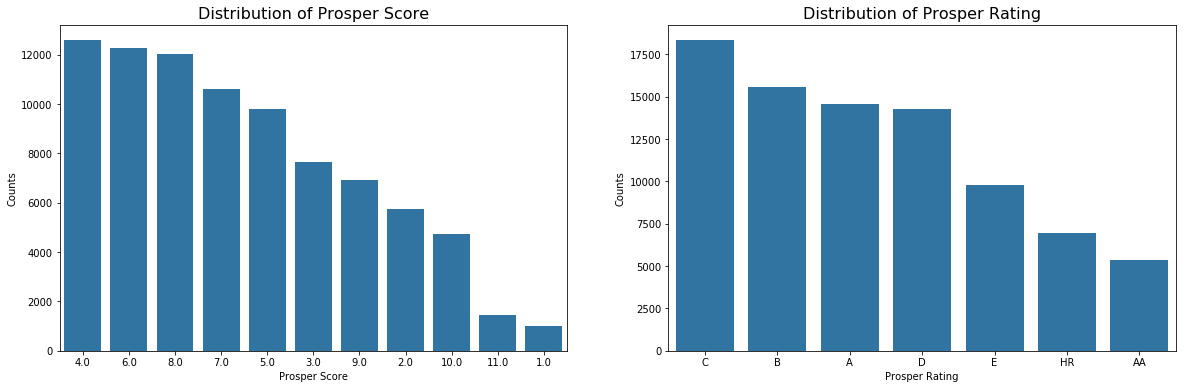

In [13]:
#Create a large figsize for subplots
def figsize(x, y):
    plt.figure(figsize=[x,y])
figsize(20,6)

color_plot = sb.color_palette()[0]

#Distribution of ProsperScore
plt.subplot(1,2,1)

def barplot(df, x_col, color, x_label, y_label, title):
    order= df[x_col].value_counts().index
    sb.countplot(data=df, x=x_col, color=color, order=order);
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=16)

barplot(df_new, 'ProsperScore', color_plot, 'Prosper Score', 'Counts', 'Distribution of Prosper Score')

#Distribution of ProsperRating (Alpha)
plt.subplot(1,2,2)
barplot(df_new, 'ProsperRating (Alpha)', color_plot, 'Prosper Rating', 'Counts', 'Distribution of Prosper Rating')

### Observation 1: 
* The distribution of prosper score has most of the score concentrated betweeen 4.0 and 5.0. More than 12,000 borrowers have a prosper score of 4.0(maximum count) and about 1000 have a prosper score of 1.0(minimum count).

* The prosper rating with the highest count is 'C' while AA has the lowest count. 

* Prosper Ratings allow investors to consider a loan's level of risk because the rating represents an estimated average annualized loss rate range. The best prosper rating is AA followed by A, B, C, D, E and loans with a prosper rating of category HR are the least reliable.

### Question 2: What is the distribution of BorrowerAPR and BorrowerRate

### Visualization 2:

In [14]:
#Compute summary stats on the BorrowerAPR column
print(df_new.BorrowerAPR.describe())


#Compute summary stats on the BorrowerRate column
print(df_new.BorrowerRate.describe());

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64
count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64


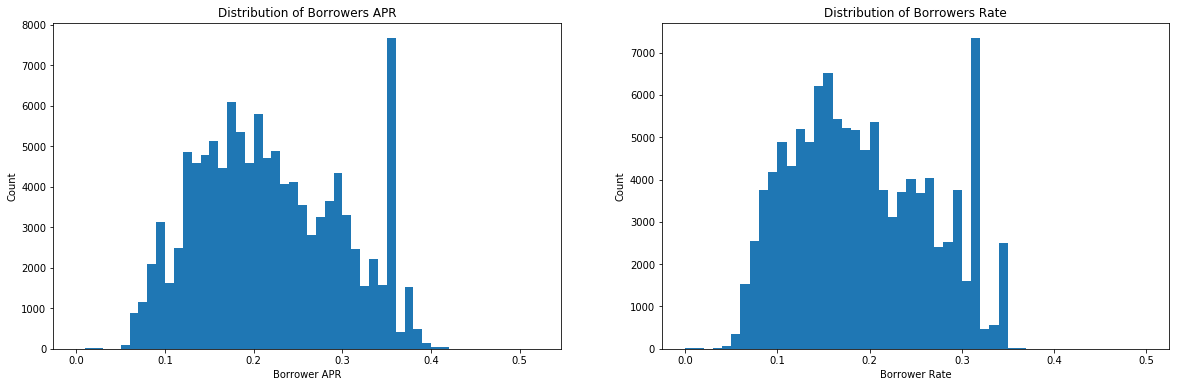

In [16]:
#drop misssing values in the BorrowerAPR column to 
#facilitate easy plotting of distribution
x = df_new[['BorrowerAPR']].dropna()


#Distribution of BorrowerAPR
figsize(20,6)

#Define function for histogram plot
def hist(df, x, bin_no, title, x_label, y_label):
    bins=np.arange(0, df[x].max()+bin_no,bin_no)
    plt.hist(data=df, x=x, bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

plt.subplot(1,2,1)
hist(x, 'BorrowerAPR', 0.01, 'Distribution of Borrowers APR', 'Borrower APR', 'Count')

plt.subplot(1,2,2)
hist(df_new, 'BorrowerRate', 0.01, 'Distribution of Borrowers Rate', 'Borrower Rate', 'Count')  

### Observation 2: 
* The distribution of BorrowerAPR is normal(mean = median =0.21). The distribution is also Unimodal.
* The distribution of BorrowerRate is also normal with mean (0.19) almost equal to median (0.18).
* The distribution resembles the borrowers APR, since Annual Percentage Rate (APR) is dependent on the Borrowers Rate(the interest rate at which money may be borrowed).

### Question 3: What is the distribution of Loan original amount and Stated Monthly income

### Visualization 3:

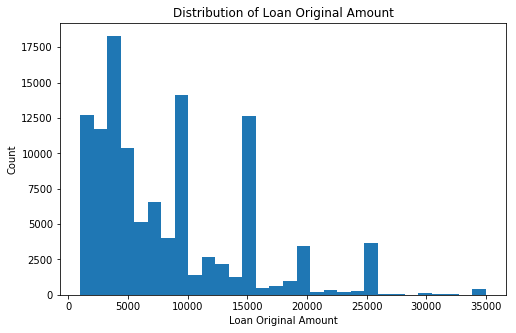

In [48]:
plt.hist(data=df_new, x='LoanOriginalAmount', bins=30);
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount');

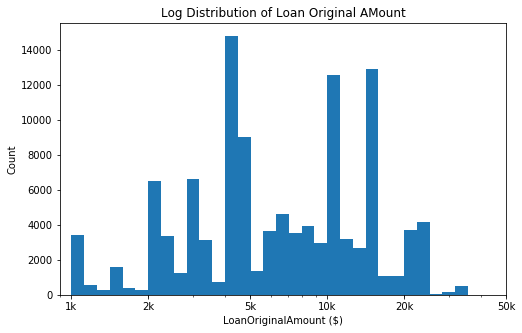

In [49]:
# # The LoanOriginalAmount has a long tail to the right, I will do a log transformation to help figure the distribution.
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df_new['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k', '10k', '20k', '50k'])
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('Count')
plt.title('Log Distribution of Loan Original AMount')
#Set axis limit
plt.xlim(900, 50000)
plt.show()

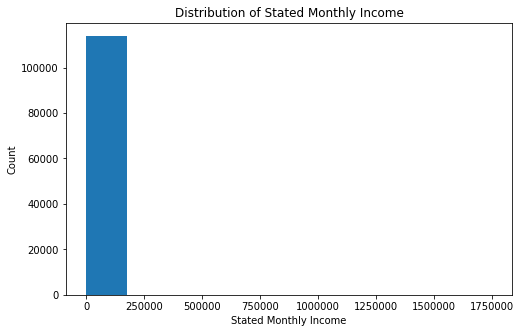

In [50]:
#Distribution of StatedMonthlyIncome 
plt.hist(data = df_new, x = 'StatedMonthlyIncome');
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count')
plt.title('Distribution of Stated Monthly Income');

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


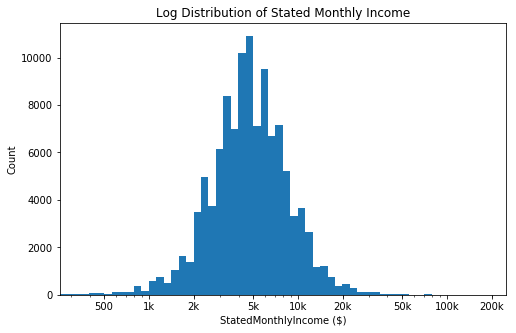

In [51]:
# # The Stated needs a log transformation to help figure the distribution.
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df_new['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([5e2, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5], ['500', '1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('Count')
plt.title('Log Distribution of Stated Monthly Income');

#Set axis limit
plt.xlim([0, 250000])
plt.show()

### Observation 3: 
* The previous distribution of LoanOriginalAmount without transformation is skewed to the right. This implies that many borrowers do not borrow large amount.

* The log distribution shows a variation in LoanOriginalAmount. Many borrowers acquire loans in the range of 5K and between 10k and 20k. Borrowers who took loans less than 2K and more than 20K are quite few.

### Question 4: What is the distribution of IncomeRange by relative proportion

### Visualization 4:

In [21]:
#Compute the maximum proportion
total_df=df_new.shape[0]
max_count=df_new['IncomeRange'].value_counts()[0]
max_prop= max_count/total_df

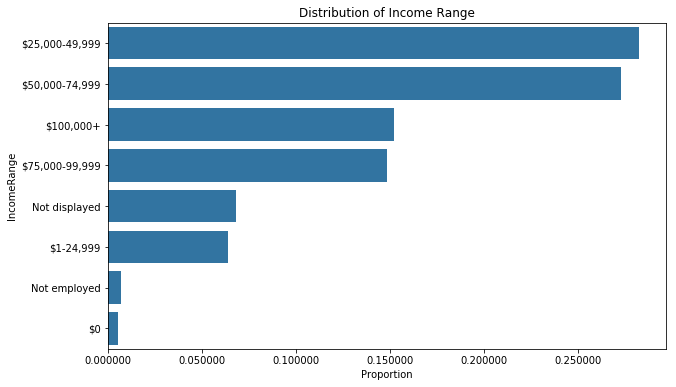

In [52]:
figsize(10,6)
#Sort by the highest value
order_income=df_new['IncomeRange'].value_counts().index

#Set tick location and name
tick_prop = np.arange(0, max_prop, 0.05)
tick_names=['{0:2f}'.format(v) for v in tick_prop]

#Plot the relative proportion
sb.countplot(data=df_new, y='IncomeRange', color=color_plot, order=order_income)
plt.xticks(tick_prop*total_df, tick_names);
plt.xlabel('Proportion');
plt.title('Distribution of Income Range');

### Observation 4:
* A greater proportion of the borrowers have an income range between $25,000-$49,999 while those with no income are few.

### Question 5: Which is the dominant employment status among borrowers and Term

### Visualization 5: 

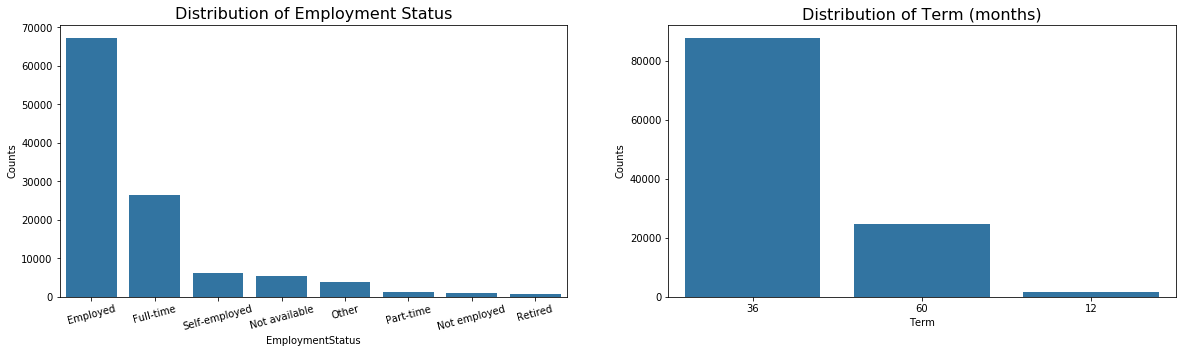

In [61]:
#Set figure size
figsize(20,5)

plt.subplot(1,2,1)
barplot(df_new, 'EmploymentStatus', color_plot, 'EmploymentStatus', 'Counts', 'Distribution of Employment Status')
plt.xticks(rotation=15)

plt.subplot(1,2,2)
barplot(df_new, 'Term', color_plot, 'Term', 'Counts', 'Distribution of Term (months)')

### Observation 5:
* The most dominant employment status is 'Employed'. This suggest that most of the borrowers (about 70,000) are employed. This is followed by full time and self employed. 
* Borrowers who are retired, part-time or unemployed have a very small count.
* According to the distribution of Term, a greater number of the loan have a term of 36 months and few with 60 and 12 months term.

### Question 6: Which are the top 11 occupation and state of borrowers.

### Visualization 6

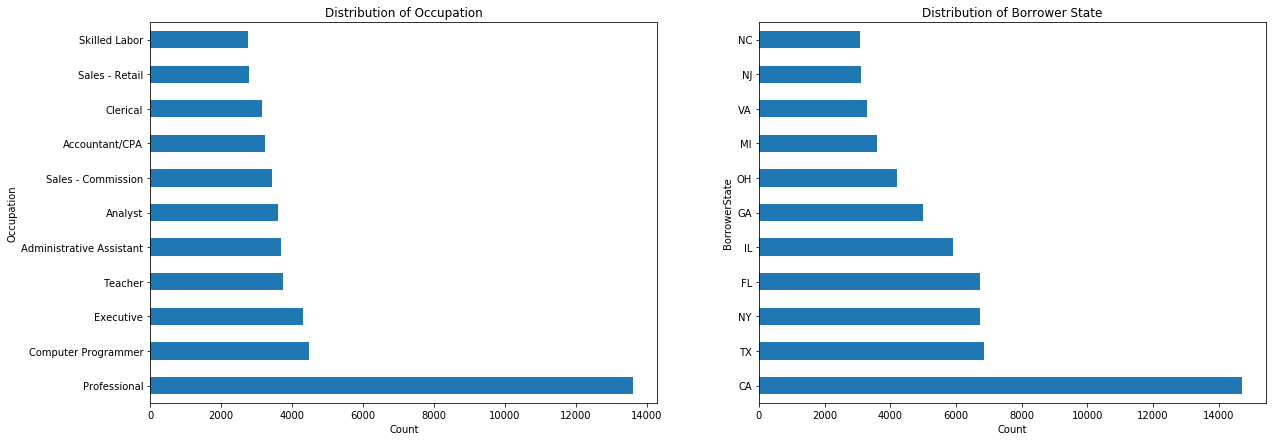

In [55]:
#Set figure size
figsize(20,7)

plt.subplot(1,2,1)
#Sort and Plot the distribution of top 10 occupation
df_new.Occupation.value_counts()[1:12].plot(kind='barh', color=color_plot);
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Distribution of Occupation');

plt.subplot(1,2,2)
#Sort and Plot the distribution of top 10 BorrowerState
df_new.BorrowerState.value_counts()[:11].plot(kind='barh', color=color_plot)
plt.xlabel('Count')
plt.ylabel('BorrowerState')
plt.title('Distribution of Borrower State');

### Observation 6:
* Most of the borrowers are Professionals. This is followed by other occupation with skilled labour at the base of the top 11 occupation.

### Question 7: What percentage of borrowers belongs to a group and what percentage are home owners?

### Visualization 7

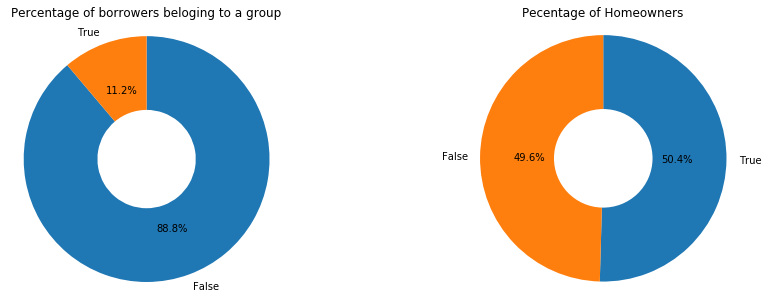

In [56]:
#Set figsize
figsize(15,5)

#Subplot 1
plt.subplot(1,2,1)
sorted_count=df_new['CurrentlyInGroup'].value_counts()
plt.pie(sorted_count, labels=sorted_count.index, autopct='%1.1f%%', startangle=90, 
        counterclock=False, wedgeprops={'width': 0.6})
plt.axis('square');
plt.title('Percentage of borrowers beloging to a group');

#Subplot 2
plt.subplot(1,2,2)
sorted_count=df_new['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_count, labels=sorted_count.index, autopct='%1.1f%%', startangle=90, 
        counterclock=False, wedgeprops={'width': 0.6})
plt.axis('square');
plt.title('Pecentage of Homeowners');

### Observation 7: 
* Only 11.2% of the borrowers belongs to a group.
* The difference between the percentage of homeowners to non homeowners is relatively small. 
* More than half of the borrowers are home owners.

### Question 8: Which is the predominant listing category?

### Visualization 8:

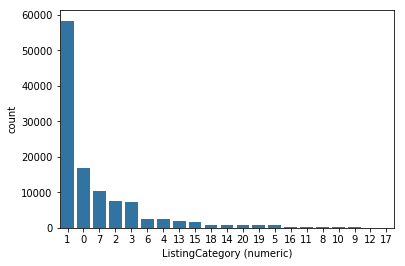

In [26]:
#Plot of listing category
order_cat= df_new['ListingCategory (numeric)'].value_counts().index
sb.countplot(data=df_new, x='ListingCategory (numeric)', color=color_plot, order=order_cat);

from matplotlib.pyplot import rcParams
rcParams['figure.figsize']= 8, 5

### Observation 8:
* The amount of borrowers who took loan for consolidation(ListingCategory1) are much (more than 50000). 
* Loan consolidation is a loan made in order to consolidate several debts into one loan, usually for the purpose of reducing the monthly payments by extending them over a longer time period.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowersAPR and borrowersRate is normal.  <br/>
> The employment status, Income range and occupation revealed that most people who apply for loans are working class with a stable employment, and relatively moderate income. <br/>
> I had to perform log transformation on the LoanOriginalAmount and StatedMonthlyIncome features.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distribution. <br/>
> The null values in the borrowers APR column were removed, and a new dataframe was created to facilitate the plotting of the top 10 borrowers occupation.

## Bivariate Exploration

> In this section, relationships between pairs of variables in the
data will be investigated.

### Question 9: What is the correlations between features in the data

### Visualization 9

In [27]:
#Create a list of numeric variables and categorical variables
numeric_vars = ['BorrowerAPR', 'BorrowerRate',
                'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome', 'Investors']
categorical_vars = ['ProsperScore', 'IncomeRange', 'EmploymentStatus', 'ProsperRating (Alpha)'] 

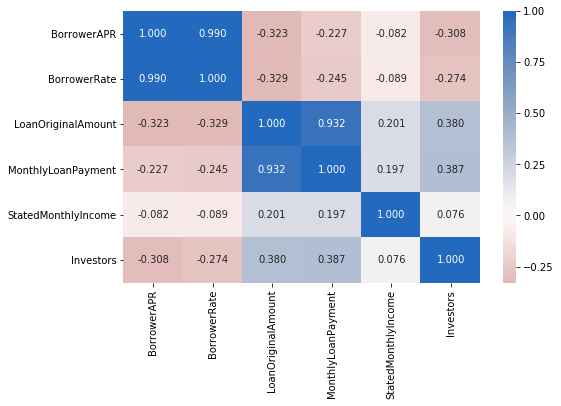

In [28]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [29]:
df_new.shape

(113937, 22)

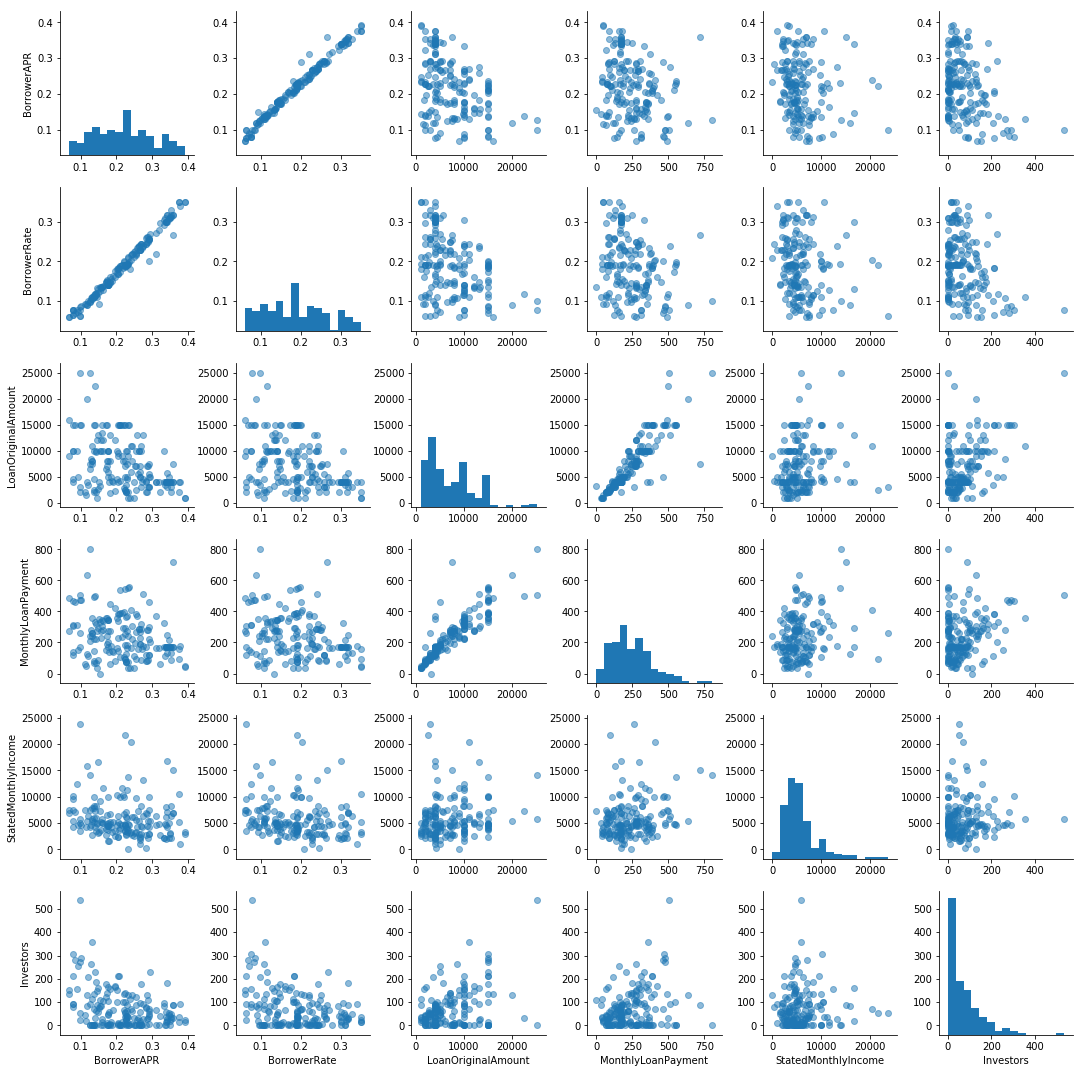

In [30]:
# plot matrix of 1000 sample of loans to facilitate clearer and faster rendering of plots.
df_new_samp = df_new.sample(1000)
g = sb.PairGrid(data = df_new_samp.dropna(), vars = numeric_vars)
g = g.map_diag(plt.hist, bins=15)
g.map_offdiag(plt.scatter, alpha=0.5);

### Observation 9: 
* Borrowers APR and Borrowers Rate are highly positively correlated with a correlation coefficient of 0.99.
* Also, the Loan Original amount and Monthly Loan payment are positively correlated. This makes sense, since individuals with high loan amount will have to pay larger amount when paying back every month. 
* APR is negatively correlated with other numerical variables aside the BorrowersRate.

### Question 10: Does ProsperScore affect Borrowers APR and Borrowers Rate?

### Visualization 10:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


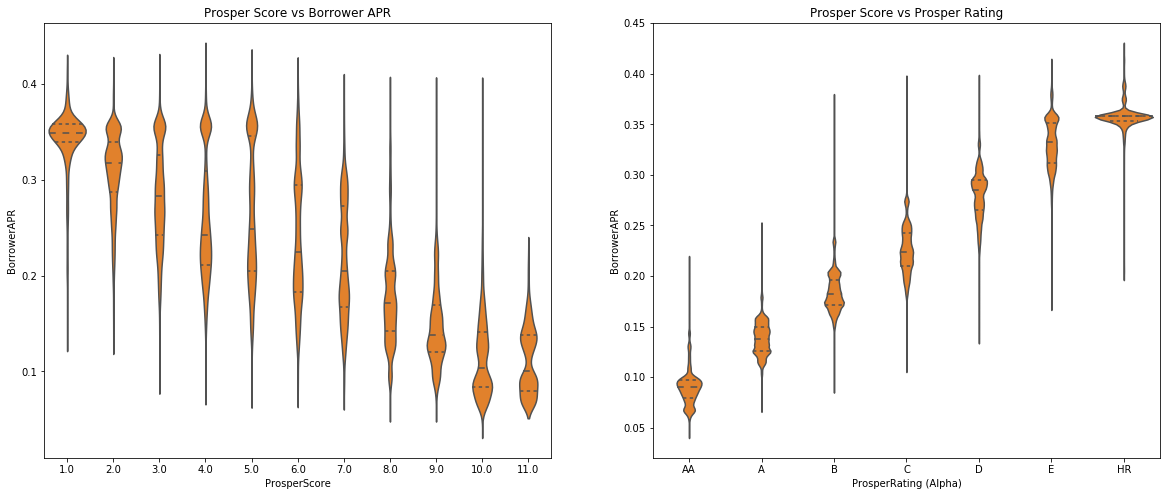

In [63]:
figsize(20,8)

#Define function for Violinplot
def violinplot(df, x_axis, y_axis):
    color2=sb.color_palette()[1]
    sb.violinplot(data=df, x=x_axis, y=y_axis, color=color2, inner='quartile');

plt.subplot(1,2,1)
#Calling the function
violinplot(df_new, 'ProsperScore', 'BorrowerAPR')
plt.title('Prosper Score vs Borrower APR')

plt.subplot(1,2,2)

#Sorting classes in order of ranking.
PR_classes=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ProsperRating_class = pd.api.types.CategoricalDtype(ordered=True, categories=PR_classes)
df_new['ProsperRating (Alpha)'] = df_new['ProsperRating (Alpha)'].astype(ProsperRating_class)
#Calling the function

violinplot(df_new, 'ProsperRating (Alpha)', 'BorrowerAPR')
plt.title('Prosper Score vs Prosper Rating');

### Observation 10: 
* Borrowers APR decreases with increasing prosper score. This may be due to the fact that borrowers with higher Prosper score are more trusted and granted lower APR compared to those with lower score.
* Borrowers APR also decreases with increasing prosper rating. The reason may be similar to the one stated above.

### Question 11: Does  ProsperRating (Alpha) affect Borrowers APR and Ratings

### Visualization 11:

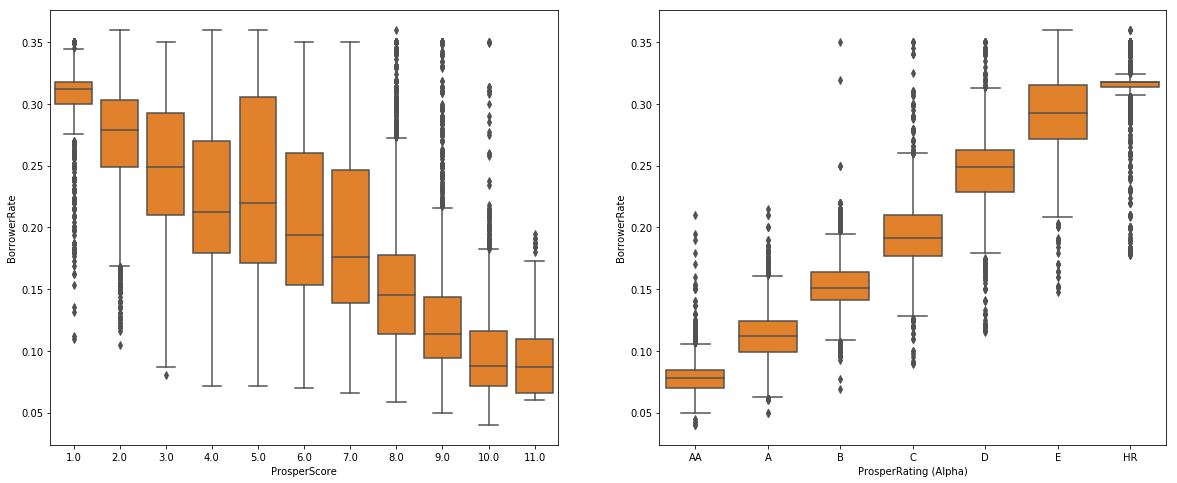

In [60]:
figsize(20,8)
plt.subplot(1,2,1)
#Define function for Violinplot
def boxplot(df, x_axis, y_axis):
    color2=sb.color_palette()[1]
    sb.boxplot(data=df, x=x_axis, y=y_axis, color=color2);
    
#Calling the function
boxplot(df_new, 'ProsperScore', 'BorrowerRate')

plt.subplot(1,2,2)
boxplot(df_new, 'ProsperRating (Alpha)', 'BorrowerRate')

### Observation 11:
* Since the distribution of Borrower Rate is similar to that of Borrower APR, their relationship with Prosper score and rating tends to follow the same pattern.

### Question 12: Does LoanOriginalAmount affect the Borrower APR?

### Visualization 12

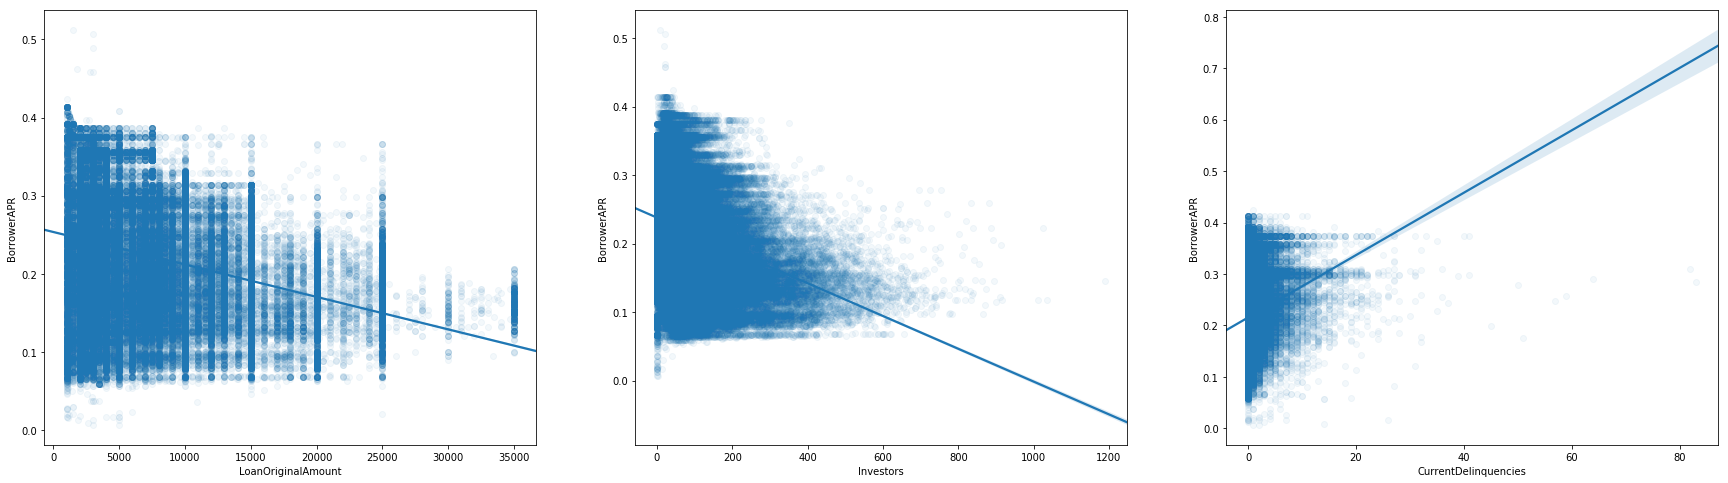

In [34]:
figsize(30, 8)
#Regression plot to visualize relation between Borrower APR and Loan Original Amount
plt.subplot(1,3,1)
sb.regplot(data = df_new, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.05});

plt.subplot(1,3,2)
sb.regplot(data = df_new, x = 'Investors', y = 'BorrowerAPR', scatter_kws={'alpha':0.05});

plt.subplot(1,3,3)
sb.regplot(data = df_new, x = 'CurrentDelinquencies', y = 'BorrowerAPR', scatter_kws={'alpha':0.05});

### Observation 12:
* Loan Original Amount is negatively correlated with APR. Borrowers who took large amount of loans tend to get low APR.
* Investors is negatively correlated with APR. Borrowers who have large amount of investors tend to get low APR.
* CurrentDeliquencies is positively correlated with borrower APR.

### Question 13: What is the relationship between the Prosper Rating and other Categorical Variables?

### Visualization 13:

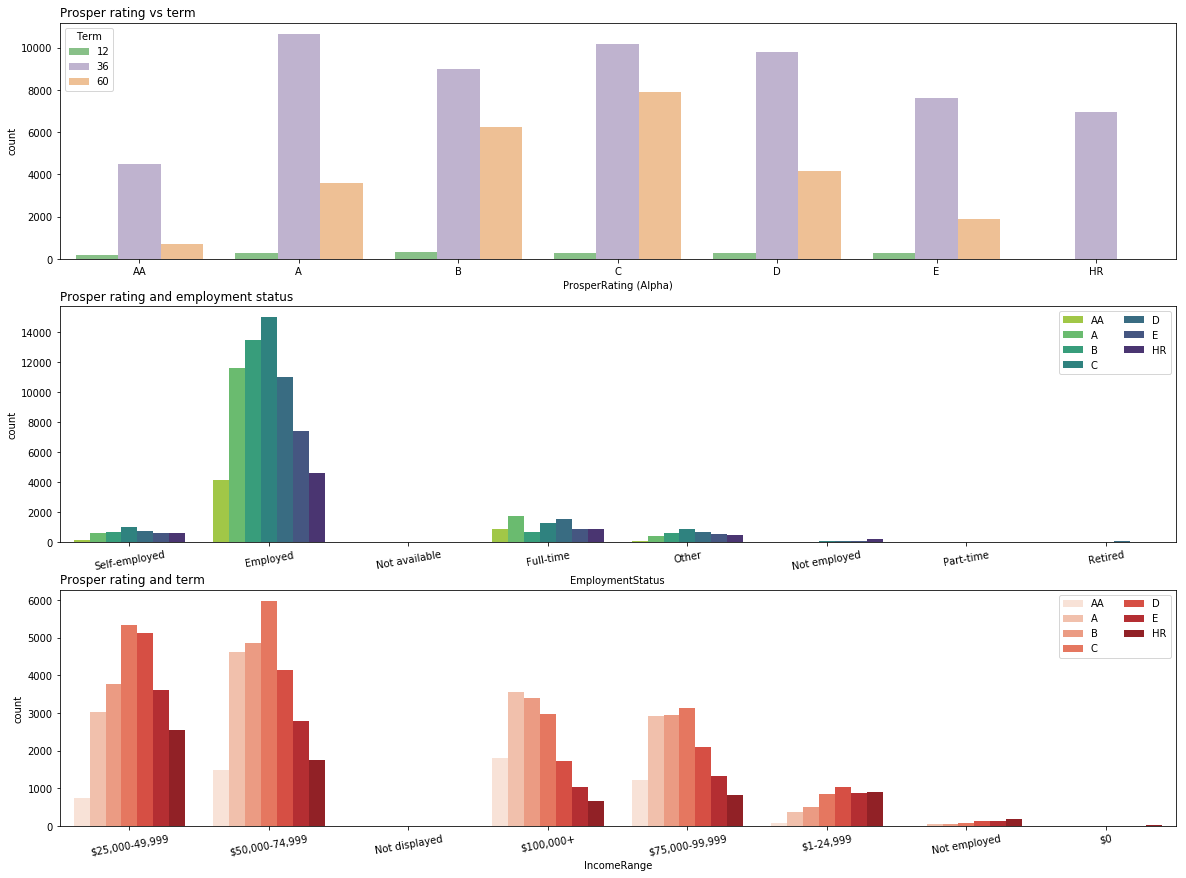

In [64]:
figsize(20, 20)

#Prosper rating and term
plt.subplot(4, 1, 1)
sb.countplot(data = df_new, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Accent')
plt.title('Prosper rating vs term', loc='left')


#Prosper rating and employment status
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_new, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'viridis_r')
ax.legend(loc = 1, ncol = 2); 
plt.xticks(rotation=10);
plt.title('Prosper rating and employment status', loc='left')

#Prosper rating and term
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_new, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Reds')
ax.legend(loc = 1, ncol = 2);
plt.xticks(rotation=10);
plt.title('Prosper rating and term', loc='left');

### Observation 13:
* Prosper rating and term
> Borrowers with 'A' Prosper rating have the highest count of 36month loan term. This tends to decrease with decreasing prosper rating. 
> Borrowers with the lowest rating('HR') do not have any count for 60 months loan term. Since these borrowers are less trustworthy, they may not be granted long term loan.

* Prosper rating and employment status
> The employed category have the highest count with most of them belonging to the 'C' rating group.

* Income and term
> The 50k to 74,99k category have the highest count with most of them belonging to the 'C' rating group.

### Question 14: Does Recommendation determine the number of investors an individual get?

### Visualization 14:

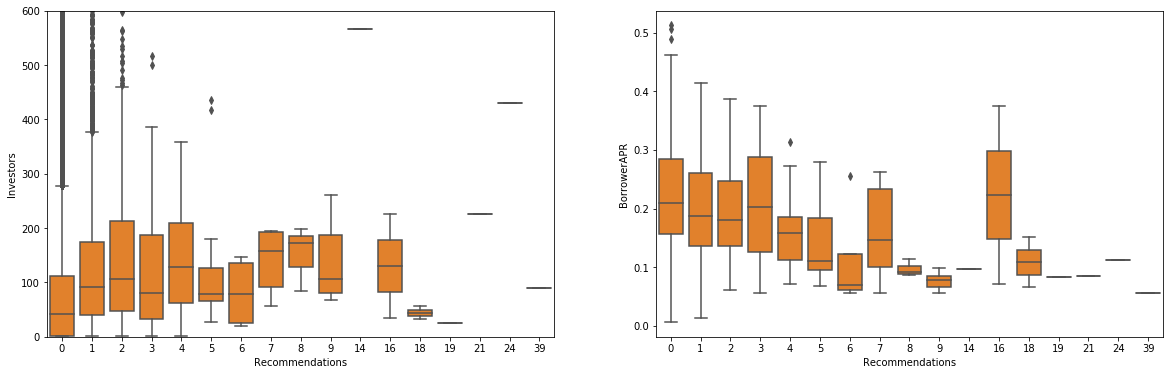

In [65]:
figsize(20,6)
#Plot of Investors vs Recommendations
plt.subplot(1,2,1)
boxplot(df_new, 'Recommendations', 'Investors')

#Set y axis limit
plt.ylim(0,600)

plt.subplot(1,2,2)
boxplot(df_new, 'Recommendations', 'BorrowerAPR')

### Observation 14:  
* Recommendations does determine the numbers of investors
* People with higher recommendation get a greater number of investors.
* Borrower APR decreases with increasing Recommendations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Features such as Loan Original Amount, Prosper score, Stated monthly income and Term affect Borrowers APR
* APR is positively correlated with Borrowers Rate and negatively correlated with other numerical variables.
* Borrowers APR decreases with increasing prosper score and increasing prosper rating.
* Loan Original Amount is negatively correlated with APR. Borrowers who took large amount of loans tend to get low APR.

### Interesting relationships between the other features (not the main feature(s) of interest)

> Loan Original amount and Monthly Loan payment are positively correlated. This makes sense, since individuals with high loan amount will have to pay larger amount when paying back every month.
> Recommendation affect the number of investors an individual get.

## Multivariate Exploration

> Plots of three or more variables will be made to investigate the data even
further.

### Question 15: Does Prosper Rating  affect APR and Term?

### Visualization 15

In [66]:
PR_classes=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ProsperRating_class = pd.api.types.CategoricalDtype(ordered=True, categories=PR_classes)
df_new['ProsperRating (Alpha)'] = df_new['ProsperRating (Alpha)'].astype(ProsperRating_class)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


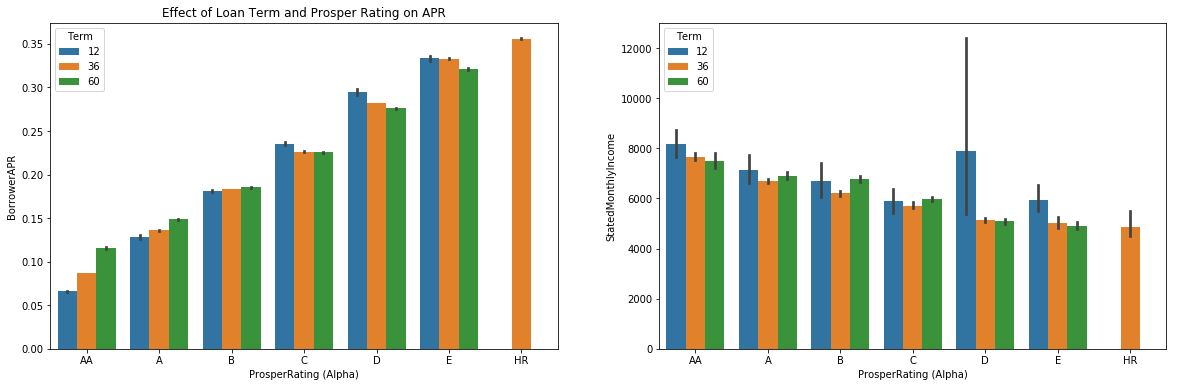

In [67]:
figsize(20, 6)
plt.subplot(1,2,1)
ax=sb.barplot(data=df_new, x= 'ProsperRating (Alpha)', y='BorrowerAPR', hue='Term')
plt.title('Effect of Loan Term and Prosper Rating on APR');

plt.subplot(1,2,2)
sb.barplot(data = df_new, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term');

### Observation 15: 
* Prosper rating and Term decreases with increasing borrower APR.
* Stated monthly income decreases with decreasing rating and term.

### Question 16: Does Prosper Rating affect LoanOriginalAmount and Term?

### Visualization 16: 

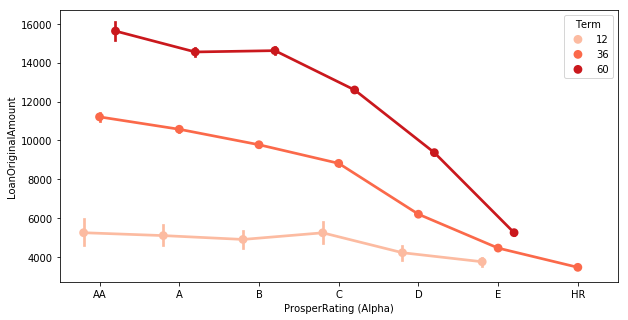

In [68]:
figsize(10,5)
sb.pointplot(data = df_new, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Reds', dodge = 0.4);

### Observation 16:
Loan Original amount decreases with decreasing Rating and borrow term.

### Relationships observed in this part of the investigation. 
### Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Prosper rating and Term decreases with increasing borrower APR.
* Stated monthly income decreases with decreasing rating and term.
* Loan Original amount decreases with decreasing Rating and borrow term.

### Were there any interesting or surprising interactions between features?
> No

## Conclusions
> The main feature of interest is Borrower APR. I investigated features that determines the APR. The borrowers status such as Occupation, EmploymentStatus, and Prosper score and their previous loan history helped to provide insight into the Borrower APR.
> I found out that:
* The distribution of borrowersAPR and borrowersRate is normal. The employment status, Income range and occupation revealed that most people who apply for loans are working class with a stable employment, and relatively moderate income. 
* APR is positively correlated with Borrowers Rate and negatively correlated with other numerical variables. The Borrowers APR decreases with increasing prosper score and increasing prosper rating. This may be because borrowers with higher prosper score and prosper rating are more trusted and thus, receives a low(better) APR.
* Loan Original Amount is negatively correlated with APR. Borrowers who took large amount of loans tend to get low APR.
* Investors is negatively correlated with APR. Borrowers who have large amount of investors tend to get low APR. 
* CurrentDeliquencies is positively correlated with borrower APR. Borrowers who failed to make previous loan repayments on time tends to receive high borrowerAPR. 
* Prosper rating and Term decreases with increasing borrower APR. Borrowers with better rating tends to get long term loan repayment coupled with low APR.
* The Stated monthly income is correlated with Rating and Term.  Borrowers who earn high amount of money tends to get better rating and better loan term.
* Loan Original amount decreases with decreasing Rating and borrow term. Borrowers who borrow large amount of money also get better rating and Loan Term.

> Outside the variable of interest, I noticed that Loan Original amount and Monthly Loan payment are positively correlated. This makes sense, since individuals with high loan amount will have to pay larger amount when paying back every month. <br/>
> Also, I found that Recommendation affect the number of investors an individual get.


# References
> [stackoverflow](https://stackoverflow.com/) <br/>
> [geeksforgeeks](https://www.geeksforgeeks.org/) <br/>
> [TowardsDataScience](https://towardsdatascience.com/) 